# Chapter 9: The basics of bar charts

For additional context see chapter 9 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [289]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get data

This chapter uses two datasets. The first dataset is composed of death-to-birth ratios for both Vienna General and Dublin Maternity Hospital. The second dataset is composed of causes of death in Dublin, Ireland in 1864.

In [290]:
# Dataset URLs
death_birth_data_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-vienna-general-dublin-maternity-death-to-birth-ratios-data.csv'
deaths_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-causes-of-death-dublin-ireland-1864-data.csv'

# Get data function
def get_data(url) -> pd.DataFrame:
    return pd.read_csv(url)

# Get death-to-birth ratio data
df = get_data(death_birth_data_url)
# Make 'Year' column dtype string
df['Year'] = df['Year'].astype('string')
# Drop 'Note' column
df = df.drop('Note', axis=1)

# Get causes of death in Dublin dataset
causes_of_death_df = get_data(deaths_url)
# Make 'Cause of Death' column astype string
causes_of_death_df['Cause of Death'] = causes_of_death_df['Cause of Death'].astype('string')
causes_of_death_df.dtypes

Location             object
Cause of Death       string
Number of Deaths    float64
dtype: object

## Create dataframes for data from Vienna General and data from Dublin Maternity Hospital

In [291]:
# Split dataframe according to hospital
vienna = df[df['Hospital'] == 'Vienna General Hospital']
dublin = df[df['Hospital'] == 'Dublin Maternity Hospital'].reset_index(drop=True)

## Fig 9.2: Bar chart of births and deaths by hospital in 1823

In [292]:
# Get data for only 1823
df_1823 = df[df['Year'] == '1823'].reset_index(drop=True)
df_1823

,Hospital,Year,Births,Deaths,Rate
0,Vienna General Hospital,1823,2872,214,7.5
1,Dublin Maternity Hospital,1823,2584,59,2.3


In [293]:
# Reshape df_1823 with melt
df_1823_melted = (
    df_1823.melt(id_vars='Hospital', 
                 var_name='Category', 
                 value_name='Count')
    .query("Count != '1823' and Category != 'Rate'")
)

# Show new dataframe
df_1823_melted

,Hospital,Category,Count
2,Vienna General Hospital,Births,2872
3,Dublin Maternity Hospital,Births,2584
4,Vienna General Hospital,Deaths,214
5,Dublin Maternity Hospital,Deaths,59


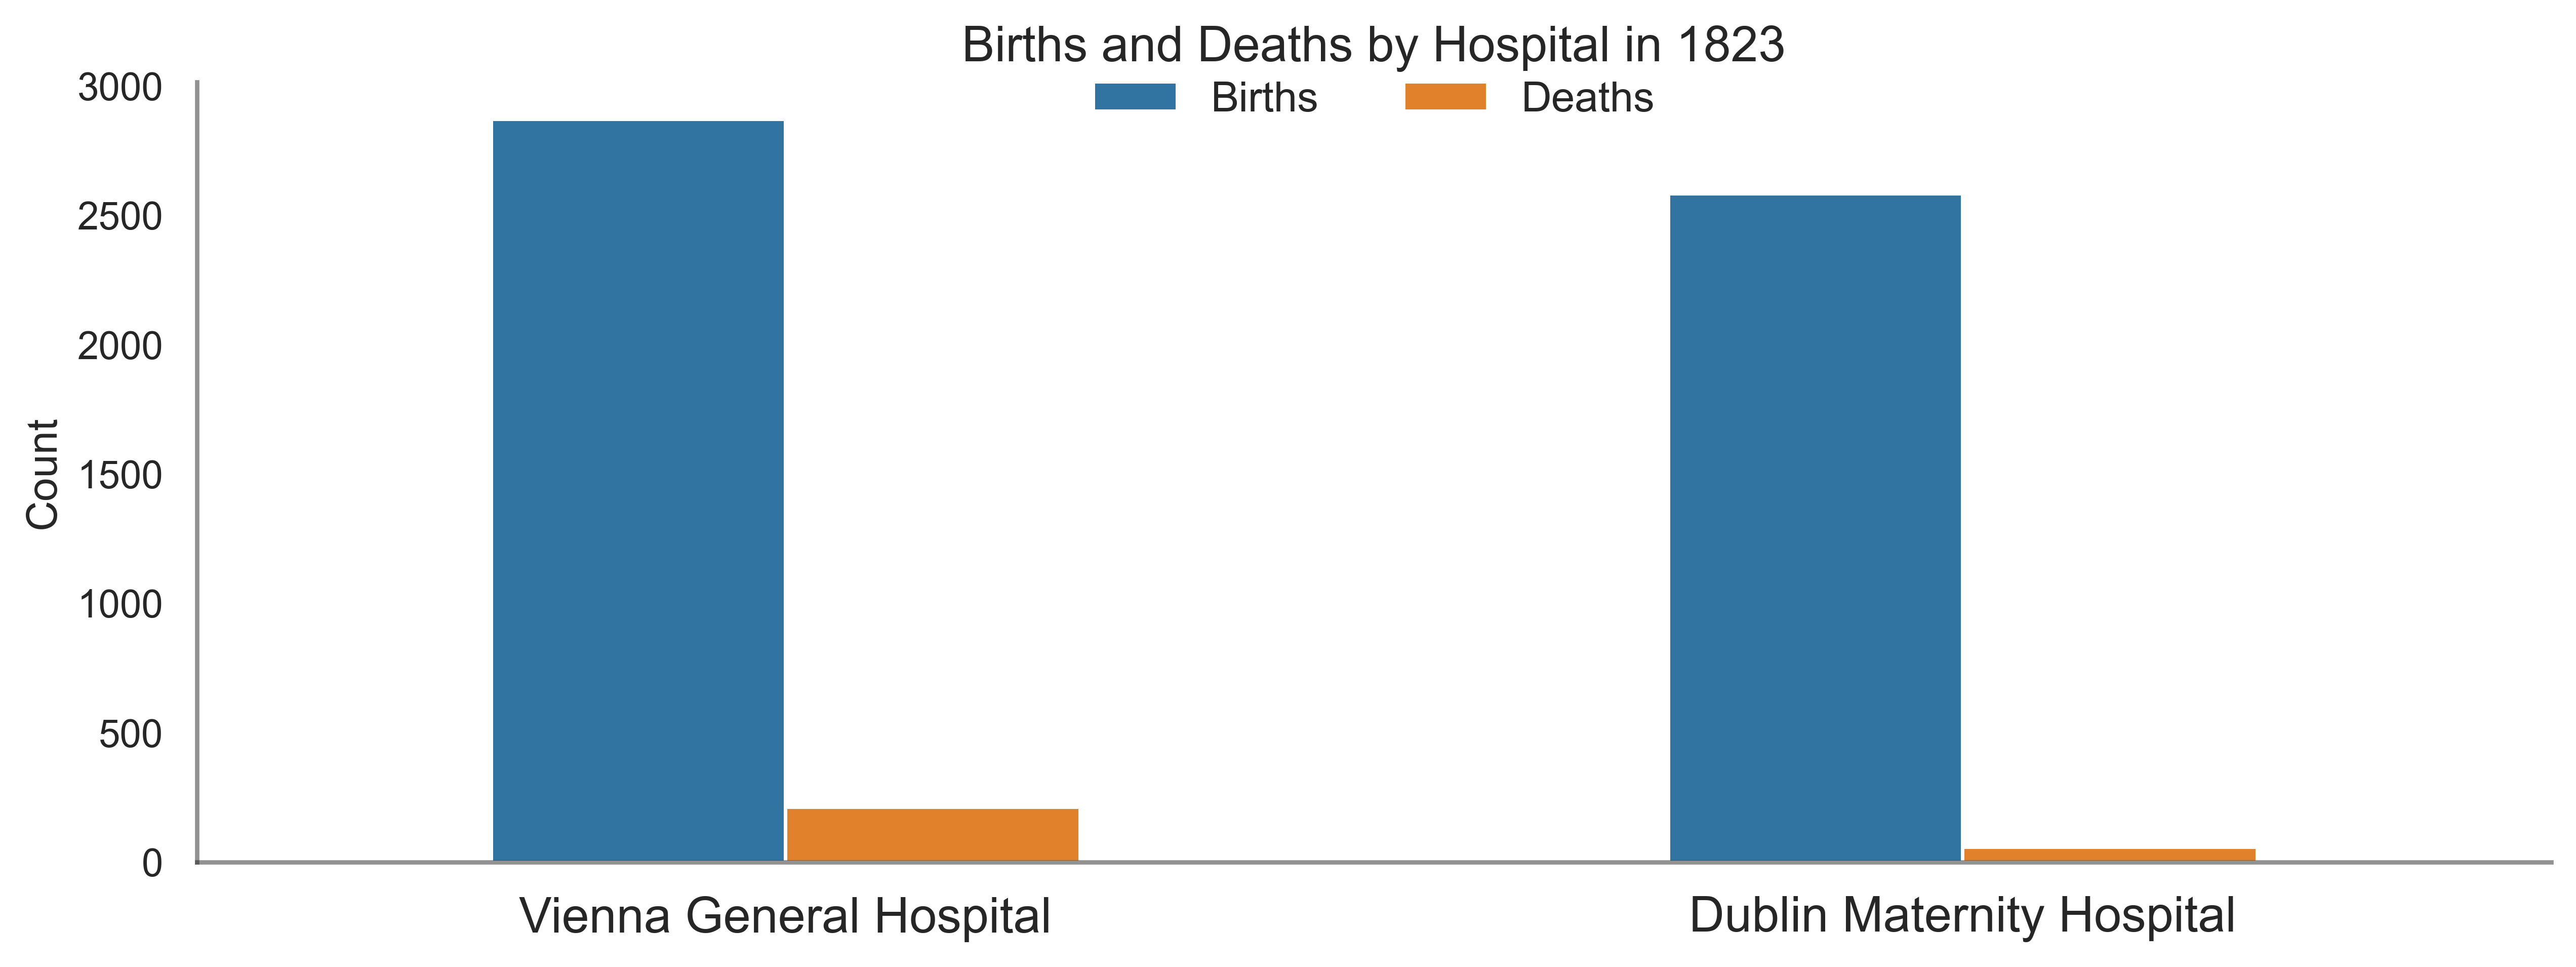

In [294]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot the data in the bar chart
barplot = sns.barplot(data=df_1823_melted, 
                      x='Hospital', 
                      y='Count', 
                      hue='Category',
                      palette=['tab:blue','tab:orange'],
                      ax=ax, 
                      width=0.5)

# Remove the legend title
legend = ax.legend_  # Access the legend object
legend.set_title("")  

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 

# Customize the legend
ax.legend(
    title="",        
    loc="upper center",   
    bbox_to_anchor=(0.5, 1.05), 
    ncol=2,
    fontsize=12,       
    frameon=False
)

# Add title
ax.set_title('Births and Deaths by Hospital in 1823', fontsize=14)

# Despine figure
sns.despine()
# Set spine alpha
ax.spines[['left','bottom']].set_alpha(0.5)
# Additional formatting
ax.set_xlabel('')

# Show plot
plt.show()

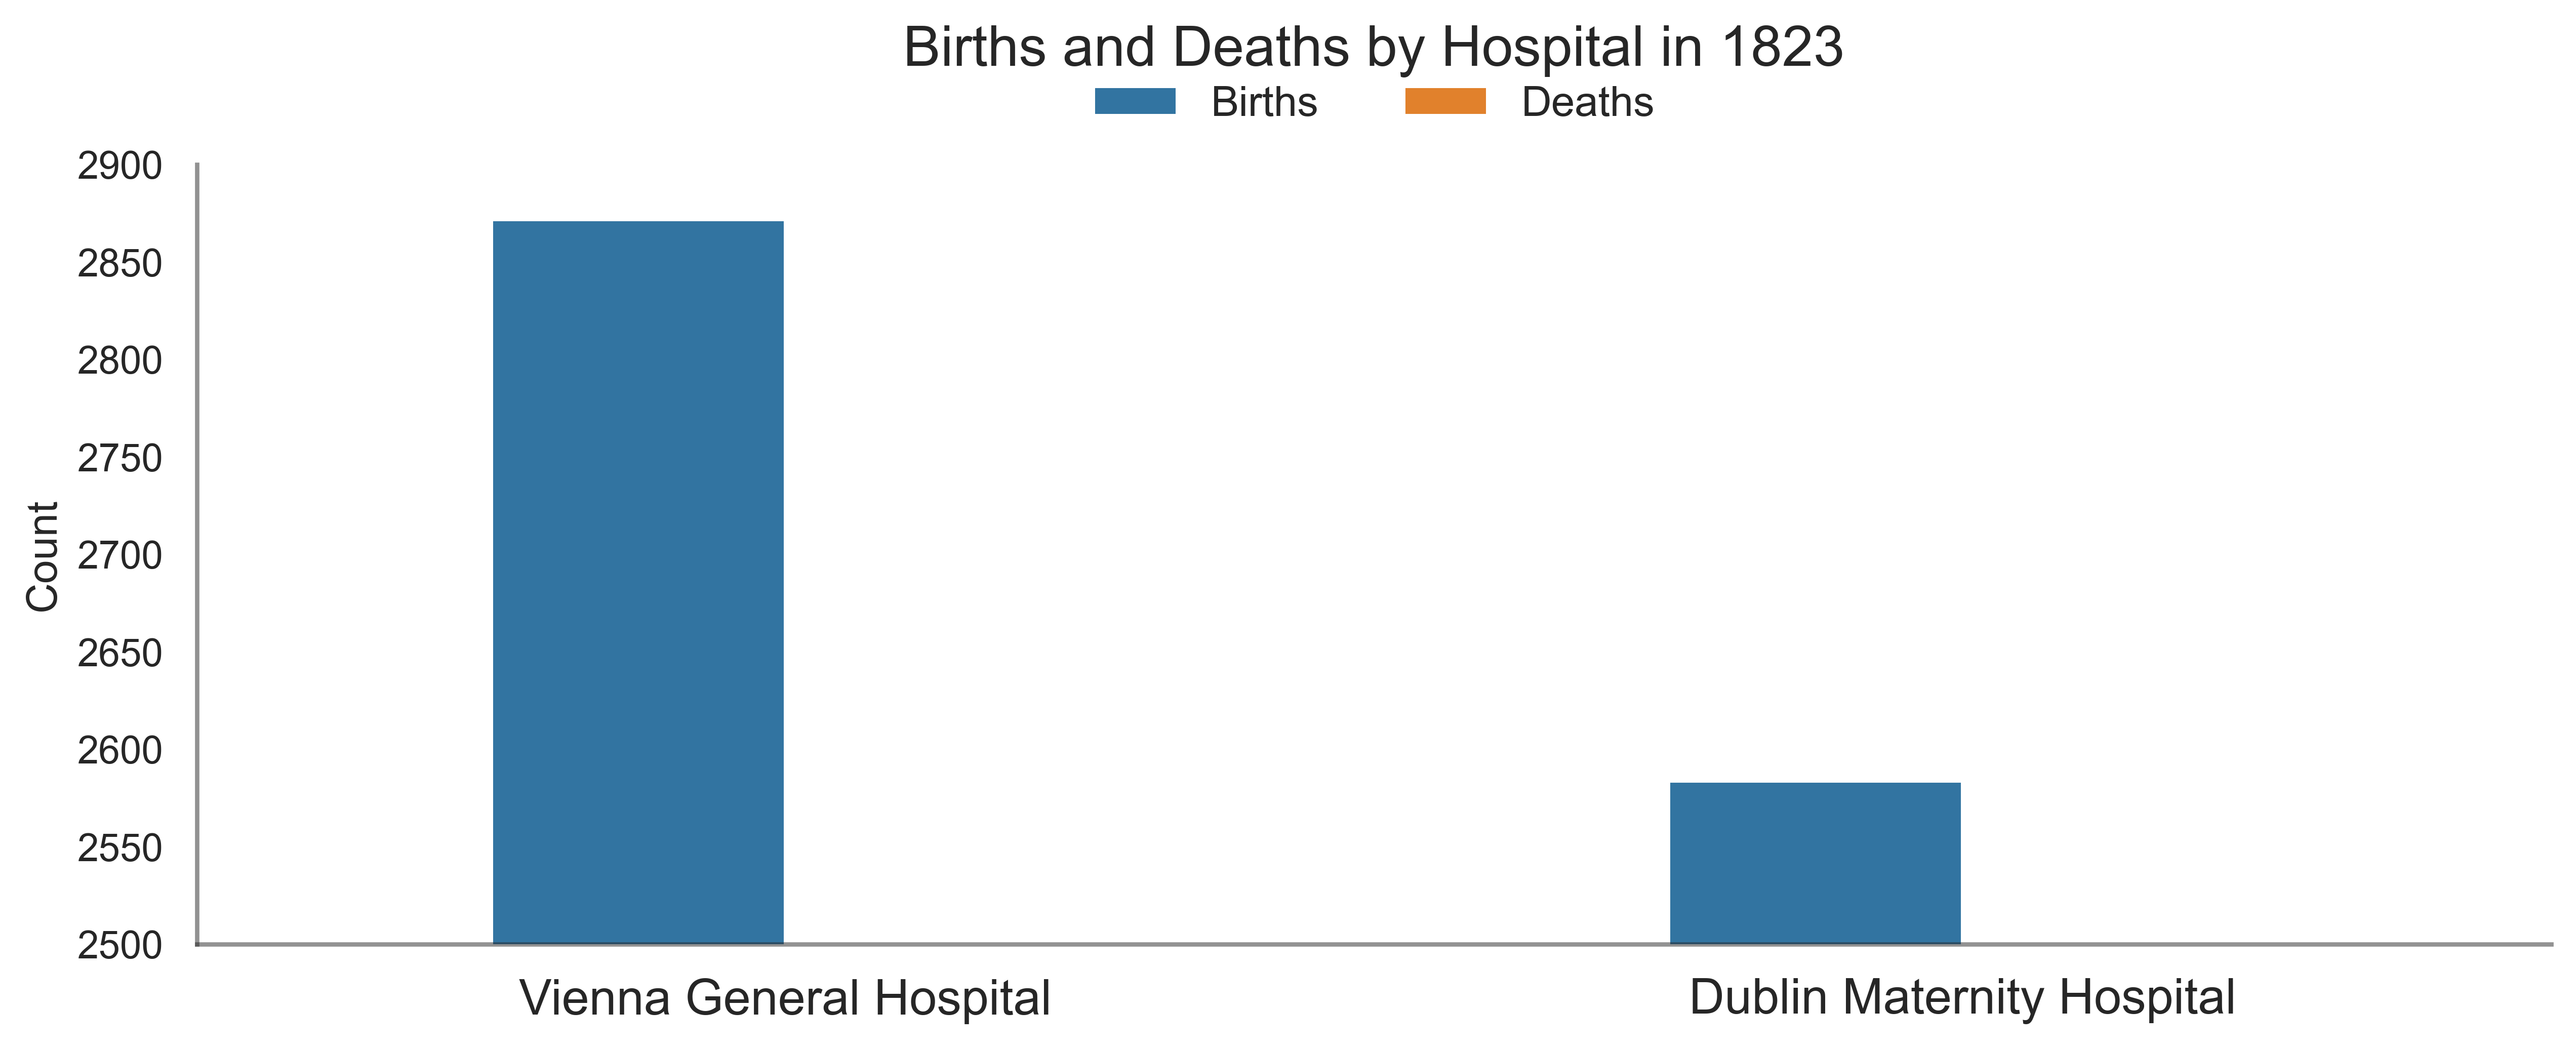

In [295]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(data=df_1823_melted, 
                      x='Hospital', 
                      y='Count', 
                      hue='Category',
                      palette=['tab:blue','tab:orange'],
                      ax=ax,
                      width=0.5)

# Set plot title
ax.set_title("Births and Deaths by Hospital in 1823", fontsize=16, y=1.10)

ax.set_xlabel('')
# ax.set_ylabel('')
# ax.set_yticks([])
sns.despine()

# Remove the legend title
legend = ax.legend_  # Access the legend object
legend.set_title("")  # Remove the 'Category' title
# ax.legend_.remove()

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 

# Customize the legend
ax.legend(
    title="",        # Remove the legend title
    loc="upper center",   # Place the legend at the top center
    bbox_to_anchor=(0.5, 1.15),  # Adjust the placement to center it
    ncol=2,           # Place the legend items in 2 columns (horizontal layout)
    fontsize=12,       # Optional: Adjust the legend font size
    frameon=False
)

# Limit y-axis
ax.set_ylim(2500,2900)
ax.spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Fig 9.4: Bar chart of death-to-birth ratios in 1823 by hospital

In [296]:
# Create ratio dataframe
df_ratio = (df_1823.melt(id_vars='Hospital',
                         var_name='Category',
                         value_name='Count')
            .query("Count != '1823' and Category == 'Rate'")
           )

df_ratio

,Hospital,Category,Count
6,Vienna General Hospital,Rate,7.5
7,Dublin Maternity Hospital,Rate,2.3


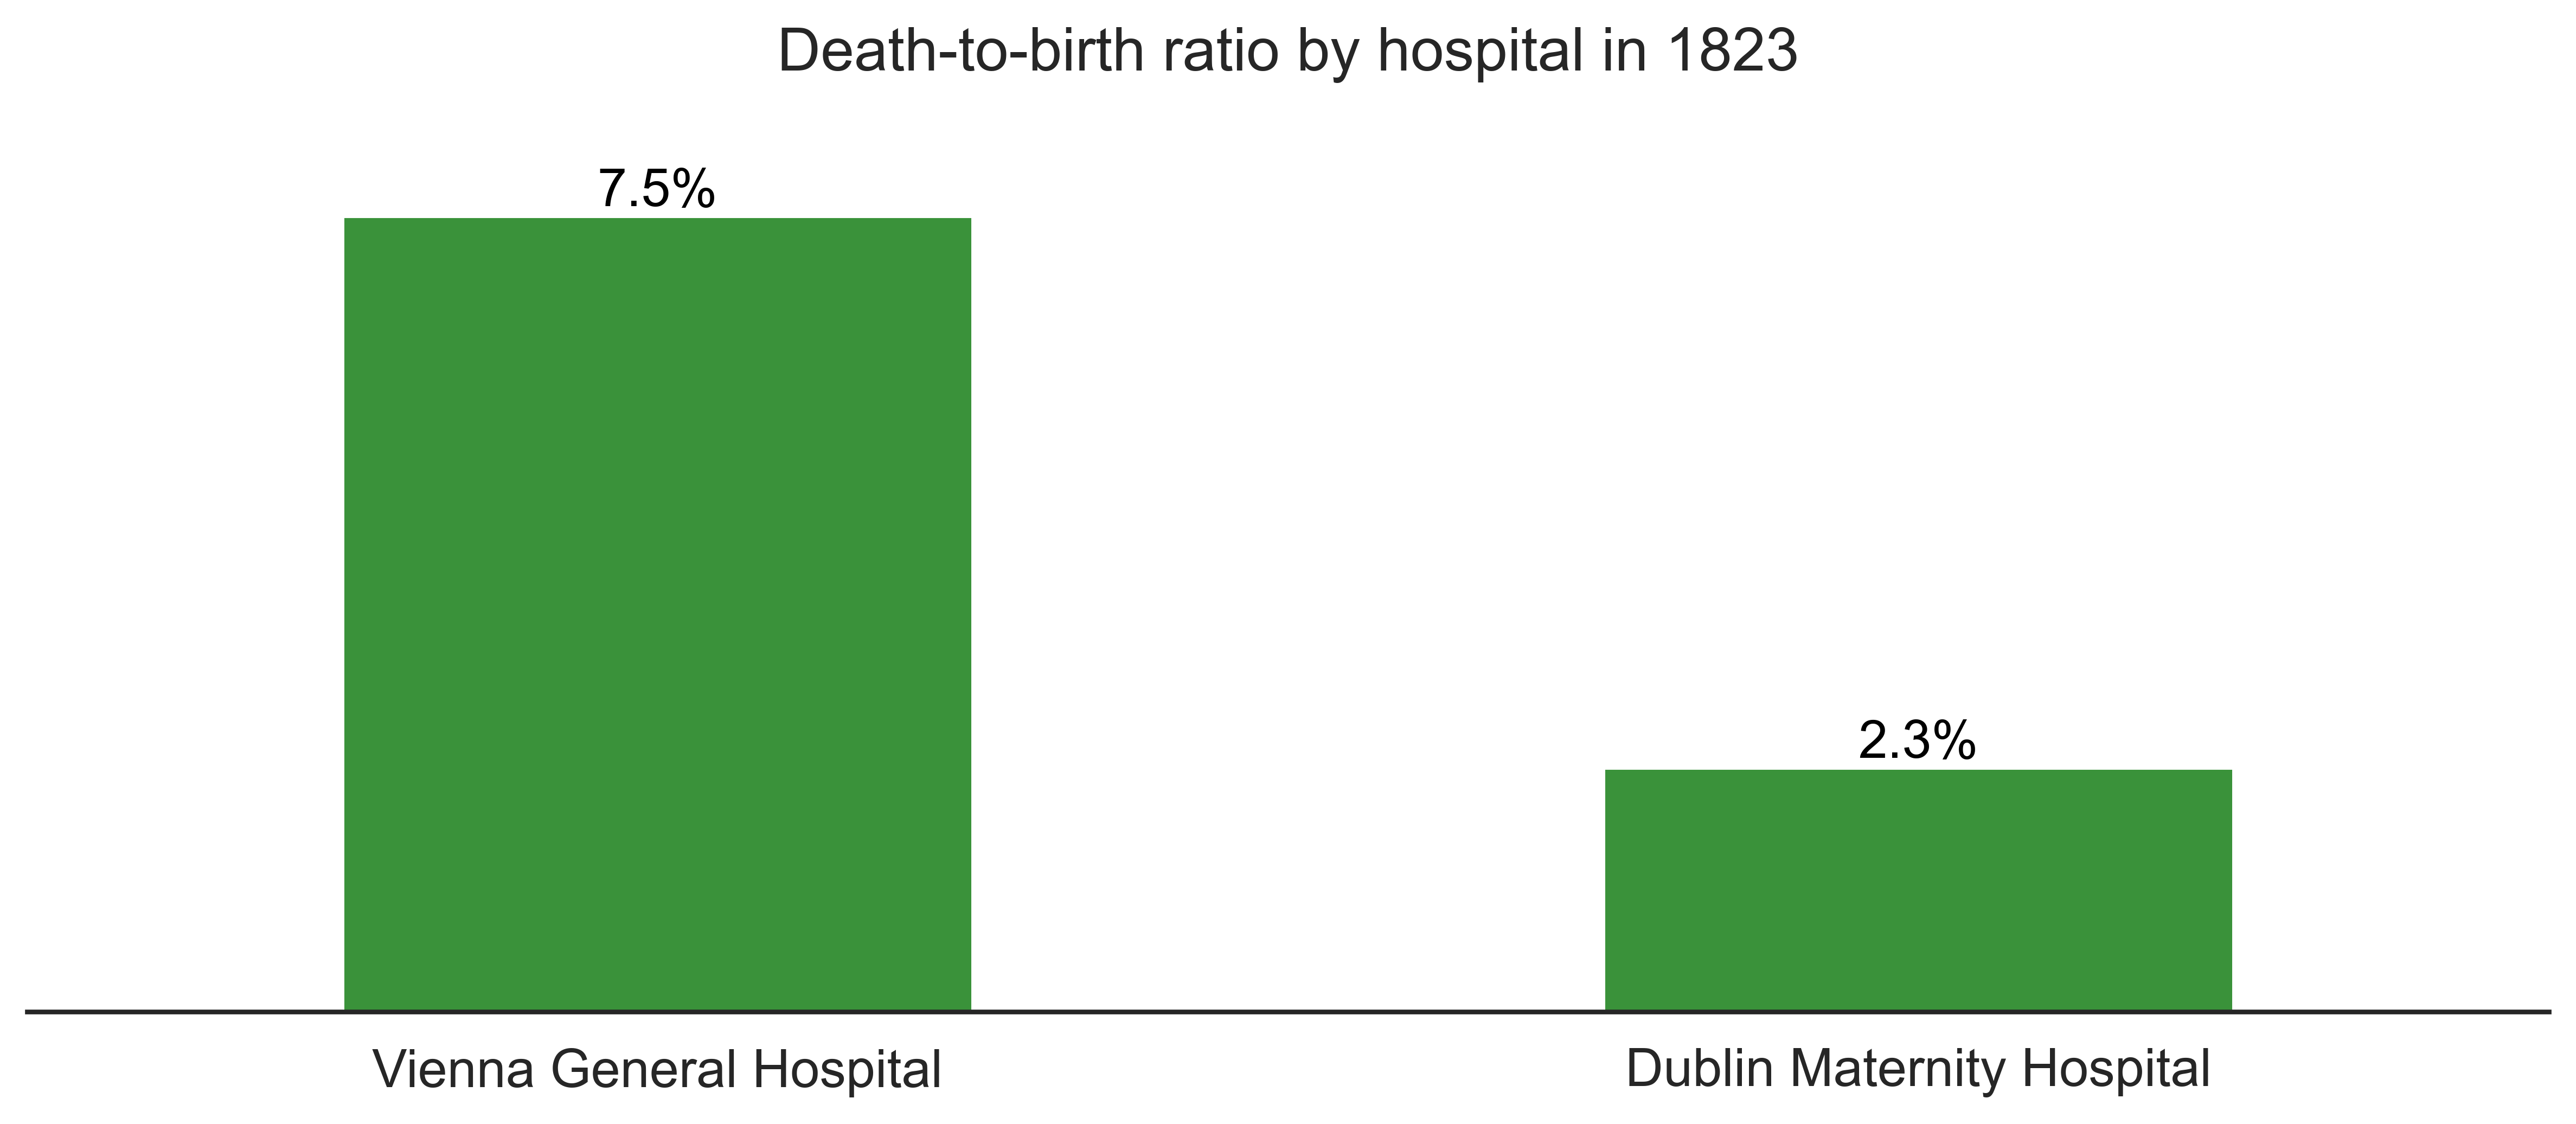

In [297]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(data=df_ratio, 
                      x='Hospital', 
                      y='Count',  
                      color='tab:green',
                      ax=ax, 
                      width=0.5,
                      errorbar=None)

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.1f}%',  # Format the label as an integer
            ha='center', va='bottom', fontsize=14, color='black'
        )

# Add title
ax.set_title("Death-to-birth ratio by hospital in 1823", 
             fontsize=16, 
             y=1.10)

# Additional formatting
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])
sns.despine(left=True)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 

# Show plot
plt.show()

## Fig 9.5: Stacked bar chart of births and deaths

In [298]:
# Stacj data using pivot
df_pivot = (
    df_1823_melted.pivot(index="Hospital", columns="Category", values="Count")
    .fillna(0)
    .loc[['Vienna General Hospital', 'Dublin Maternity Hospital']]
            )

df_pivot

Category,Births,Deaths
Hospital,,
Vienna General Hospital,2872,214
Dublin Maternity Hospital,2584,59


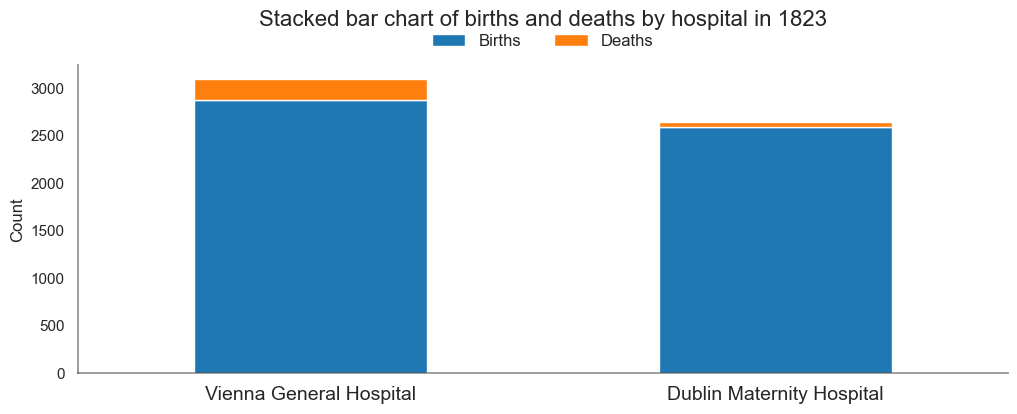

In [299]:
# Plot a stacked bar chart
ax = df_pivot.plot(kind='bar', 
                   stacked=True, 
                   figsize=(12, 4), 
                   color=['tab:blue', 'tab:orange'])

# Set labels and title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Stacked bar chart of births and deaths by hospital in 1823', fontsize=16, y=1.10)

# Customize the legend
plt.legend(
    title="",        # Remove the legend title
    loc="upper center",   # Place the legend at the top center
    bbox_to_anchor=(0.5, 1.15),  # Adjust the placement to center it
    ncol=2,           # Place the legend items in 2 columns (horizontal layout)
    fontsize=12,       # Optional: Adjust the legend font size
    frameon=False
)

# Despine
sns.despine()
# Set alphas
ax.spines[['left','bottom']].set_alpha(0.5)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14)

# Rotate the x-tick labels
plt.xticks(rotation=0) 

# Display the plot
plt.show()

## Fig 9.6: Pie chart

In [300]:
# Create dataframe of just deaths in 1823
df_1823_deaths = (df_1823_melted[df_1823_melted['Category'] == 'Deaths']
                  .reset_index(drop=True)
                 )

# Add Deaths % columns
df_1823_deaths['Percent'] = (df_1823_deaths['Count']/df_1823_deaths['Count']
     .sum()*100)
            
df_1823_deaths

,Hospital,Category,Count,Percent
0,Vienna General Hospital,Deaths,214,78.388278
1,Dublin Maternity Hospital,Deaths,59,21.611722


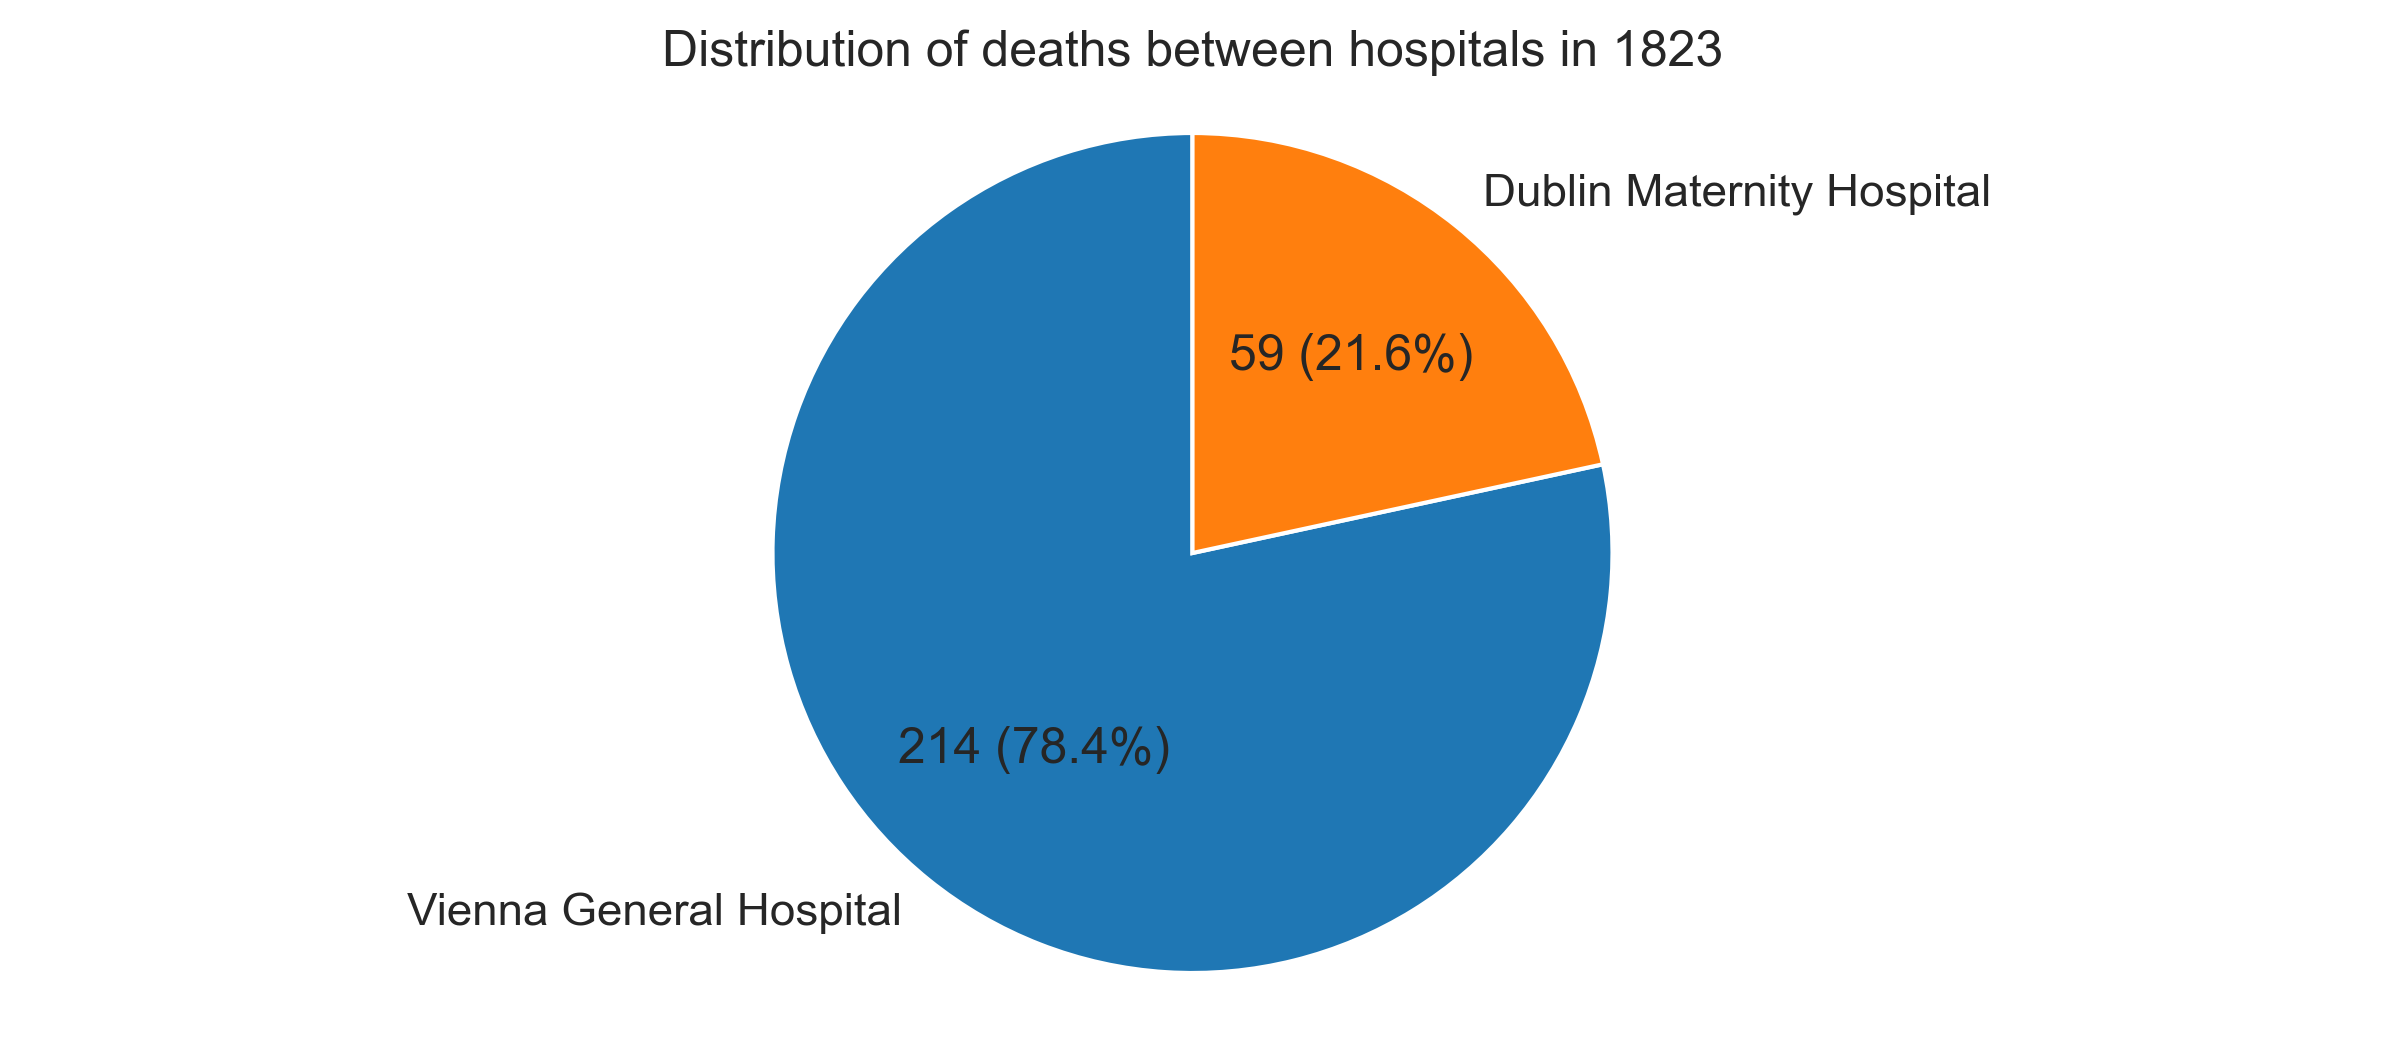

In [301]:
sizes = df_1823_deaths['Count']
labels = df_1823_deaths['Hospital']
colors = ['tab:blue', 'tab:orange']

# Function to format the pie chart with both count and percentage
def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

# Plot the pie chart
plt.figure(figsize=(10, 4), dpi=300)
plt.pie(sizes, 
        labels=labels, 
        autopct=lambda pct: func(pct, sizes), 
        startangle=90, 
        colors=colors, 
        radius=0.5)

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')  
plt.title('Distribution of deaths between hospitals in 1823')

# Display the pie chart
plt.show()

## Fig 9.7: Bar Chart of distribution of death-to-birth ratios

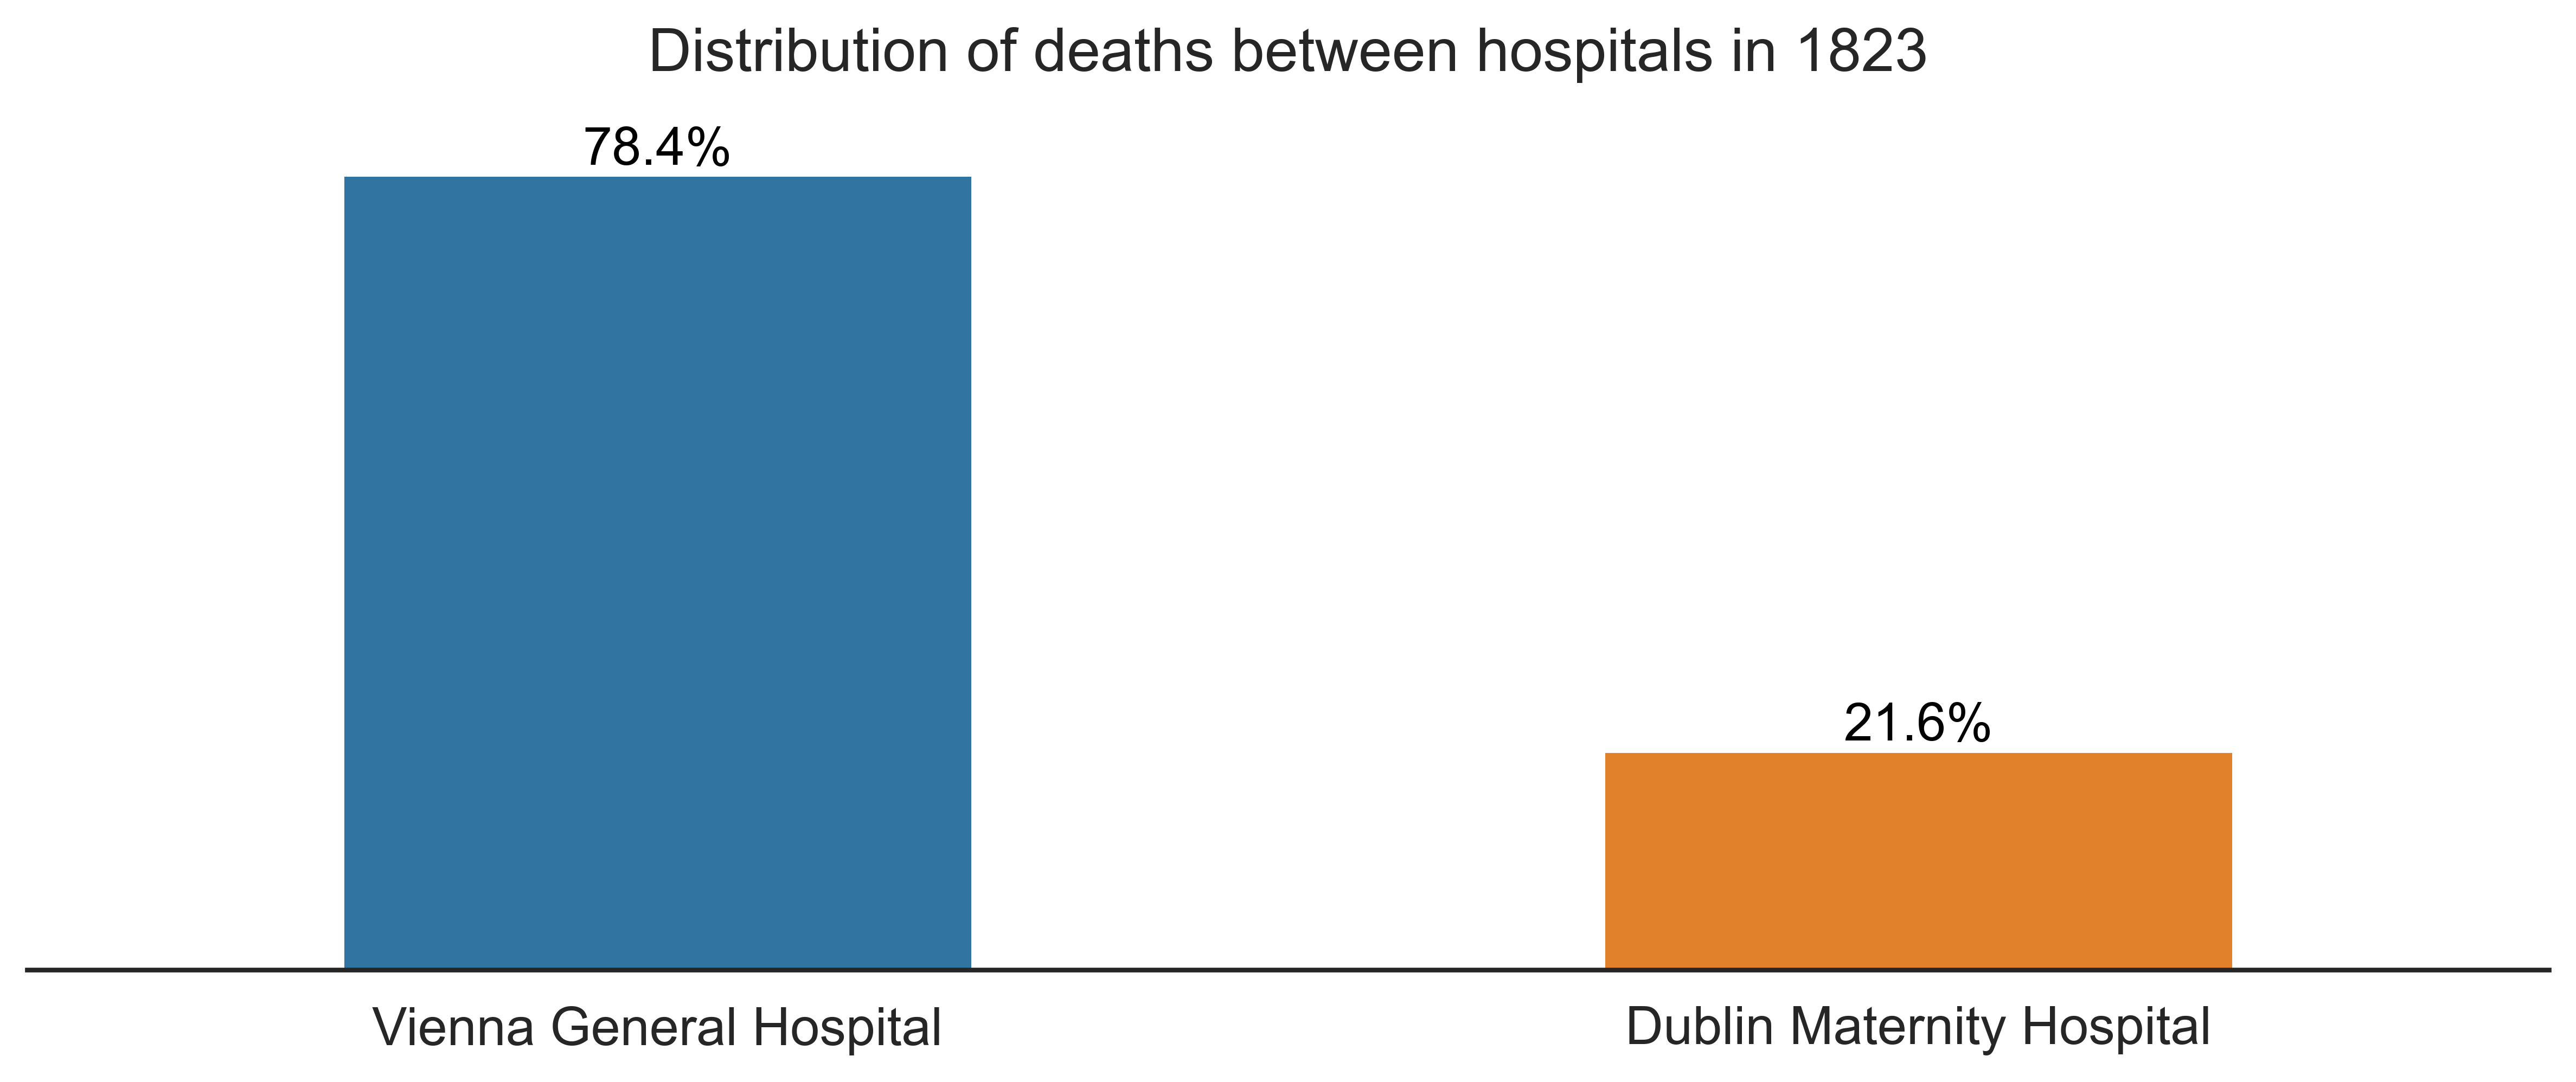

In [302]:
# Data for the pie chart
labels = ['Vienna General Hospital', 'Dublin Maternity Hospital']
sizes = df_1823_deaths['Count']
percents = df_1823_deaths['Percent']

colors = ['tab:blue', 'tab:orange']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(x=labels, 
                      y=percents,
                      palette=colors,
                      ax=ax,
                      width=0.5) 

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.1f}%',  # Format the label as an integer
            ha='center', va='bottom', fontsize=14, color='black'
        )

# Add title
plt.title('Distribution of deaths between hospitals in 1823', fontsize=16, y=1.05)

# Additional formatting
ax.set_yticks([])
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=14)
sns.despine(left=True)

# Show plot
plt.show()

## Fig 9.8: Deviation chart of percent change

In [303]:
# Calculate percent change for Vienna General births
vienna_births = (
    vienna[vienna['Year'].isin(['1823', '1824'])][['Hospital', 'Year', 'Births']]
    .reset_index(drop=True)
    .assign(**{"Percent Change": lambda df: df['Births'].pct_change()
               .mul(100).round(1)})
                )

# Show resulting dataframe
vienna_births

,Hospital,Year,Births,Percent Change
0,Vienna General Hospital,1823,2872,NaN
1,Vienna General Hospital,1824,2911,1.4


In [304]:
# Calculate percent change for Dublin Maternity births
dublin_births = (
    dublin[dublin['Year'].isin(['1823','1824'])][['Hospital','Year','Births']]
    .reset_index(drop=True)
    .assign(**{"Percent Change": lambda df: df['Births'].pct_change()
               .mul(100).round(1)})
                )
# Show resulting dataframe
dublin_births

,Hospital,Year,Births,Percent Change
0,Dublin Maternity Hospital,1823,2584,NaN
1,Dublin Maternity Hospital,1824,2446,-5.3


In [305]:
# Combine the Vienna births dataframe and Dublin births dataframe
births_combined = pd.concat([vienna_births[['Hospital', 'Percent Change']], 
                             dublin_births[['Hospital', 'Percent Change']]], 
                            ignore_index=True).dropna()
births_combined

,Hospital,Percent Change
1,Vienna General Hospital,1.4
3,Dublin Maternity Hospital,-5.3


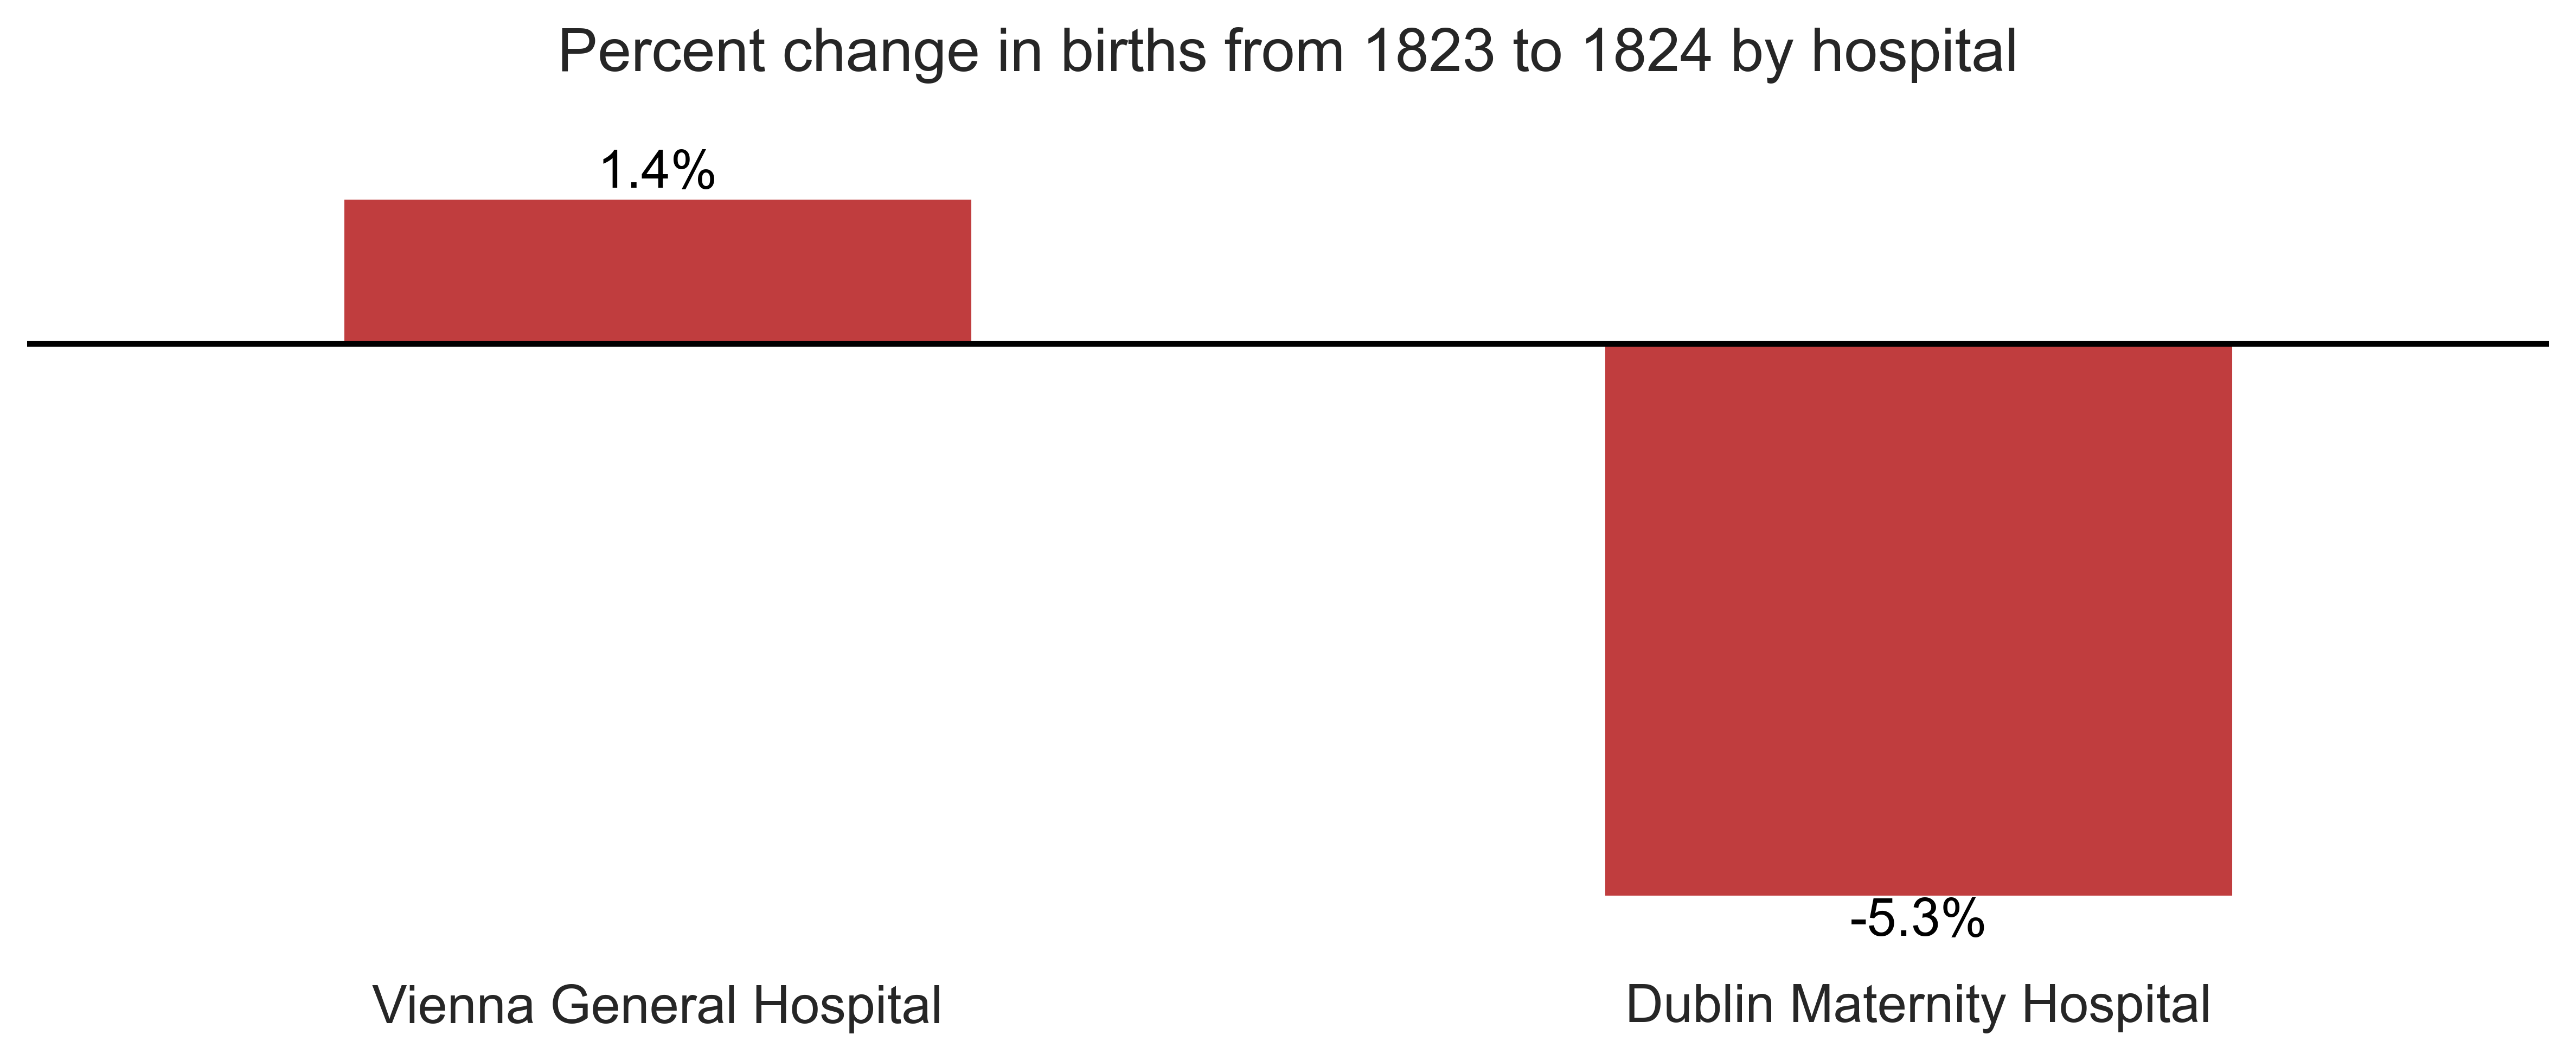

In [306]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Plot data in bar chart
barplot = sns.barplot(data=births_combined, 
                      x='Hospital', 
                      y='Percent Change', 
                      ax=ax,
                      width=0.5,
                      color='tab:red') 

# Fix y-axis limits
ax.set_ylim(-6,2)

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.1f}%',  # Format the label as an integer
            ha='center', va='bottom', fontsize=14, color='black')
    elif height < 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.1f}%',  # Format the label as an integer
            ha='center', va='top', fontsize=14, color='black'
        )
    

# Add horizontal line at zero 
ax.axhline(c='black')

# Add the title
plt.title('Percent change in births from 1823 to 1824 by hospital', 
          fontsize=16, 
          y=1.05)

# Other formating
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', 
               which='both', 
               length=0, 
               labelsize=14)

# Despine figure
sns.despine(left=True, bottom=True)

# Show plot
plt.show()

## Fig 9.9: Pareto chart

In [307]:
# Sort causes of death dataframe by Number of Deaths column
causes_of_death_df = (causes_of_death_df.sort_values(by='Number of Deaths', ascending=False)
                      .reset_index(drop=True)
                      .assign(**{"Cumulative Percentage": lambda df: round(df['Number of Deaths'].cumsum() / df['Number of Deaths'].sum() * 100, 1)})
                     )
# Show results
causes_of_death_df

,Location,Cause of Death,Number of Deaths,Cumulative Percentage
0,Dublin (North & South),Respiratory,1582.00,41.0
1,Dublin (North & South),Consumption,974.00,66.2
2,Dublin (North & South),Fever,394.00,76.4
3,Dublin (North & South),Diarrhea,213.00,81.9
4,Dublin (North & South),Violence,194.00,86.9
5,Dublin (North & South),Scarlatina,153.00,90.9
6,Dublin (North & South),Whooping-cough,82.00,93.0
7,Dublin (North & South),Dysentery,47.00,94.2
8,Dublin (North & South),Diphtheria,43.00,95.4
9,Dublin (North & South),Childbed Fever,43.00,96.5


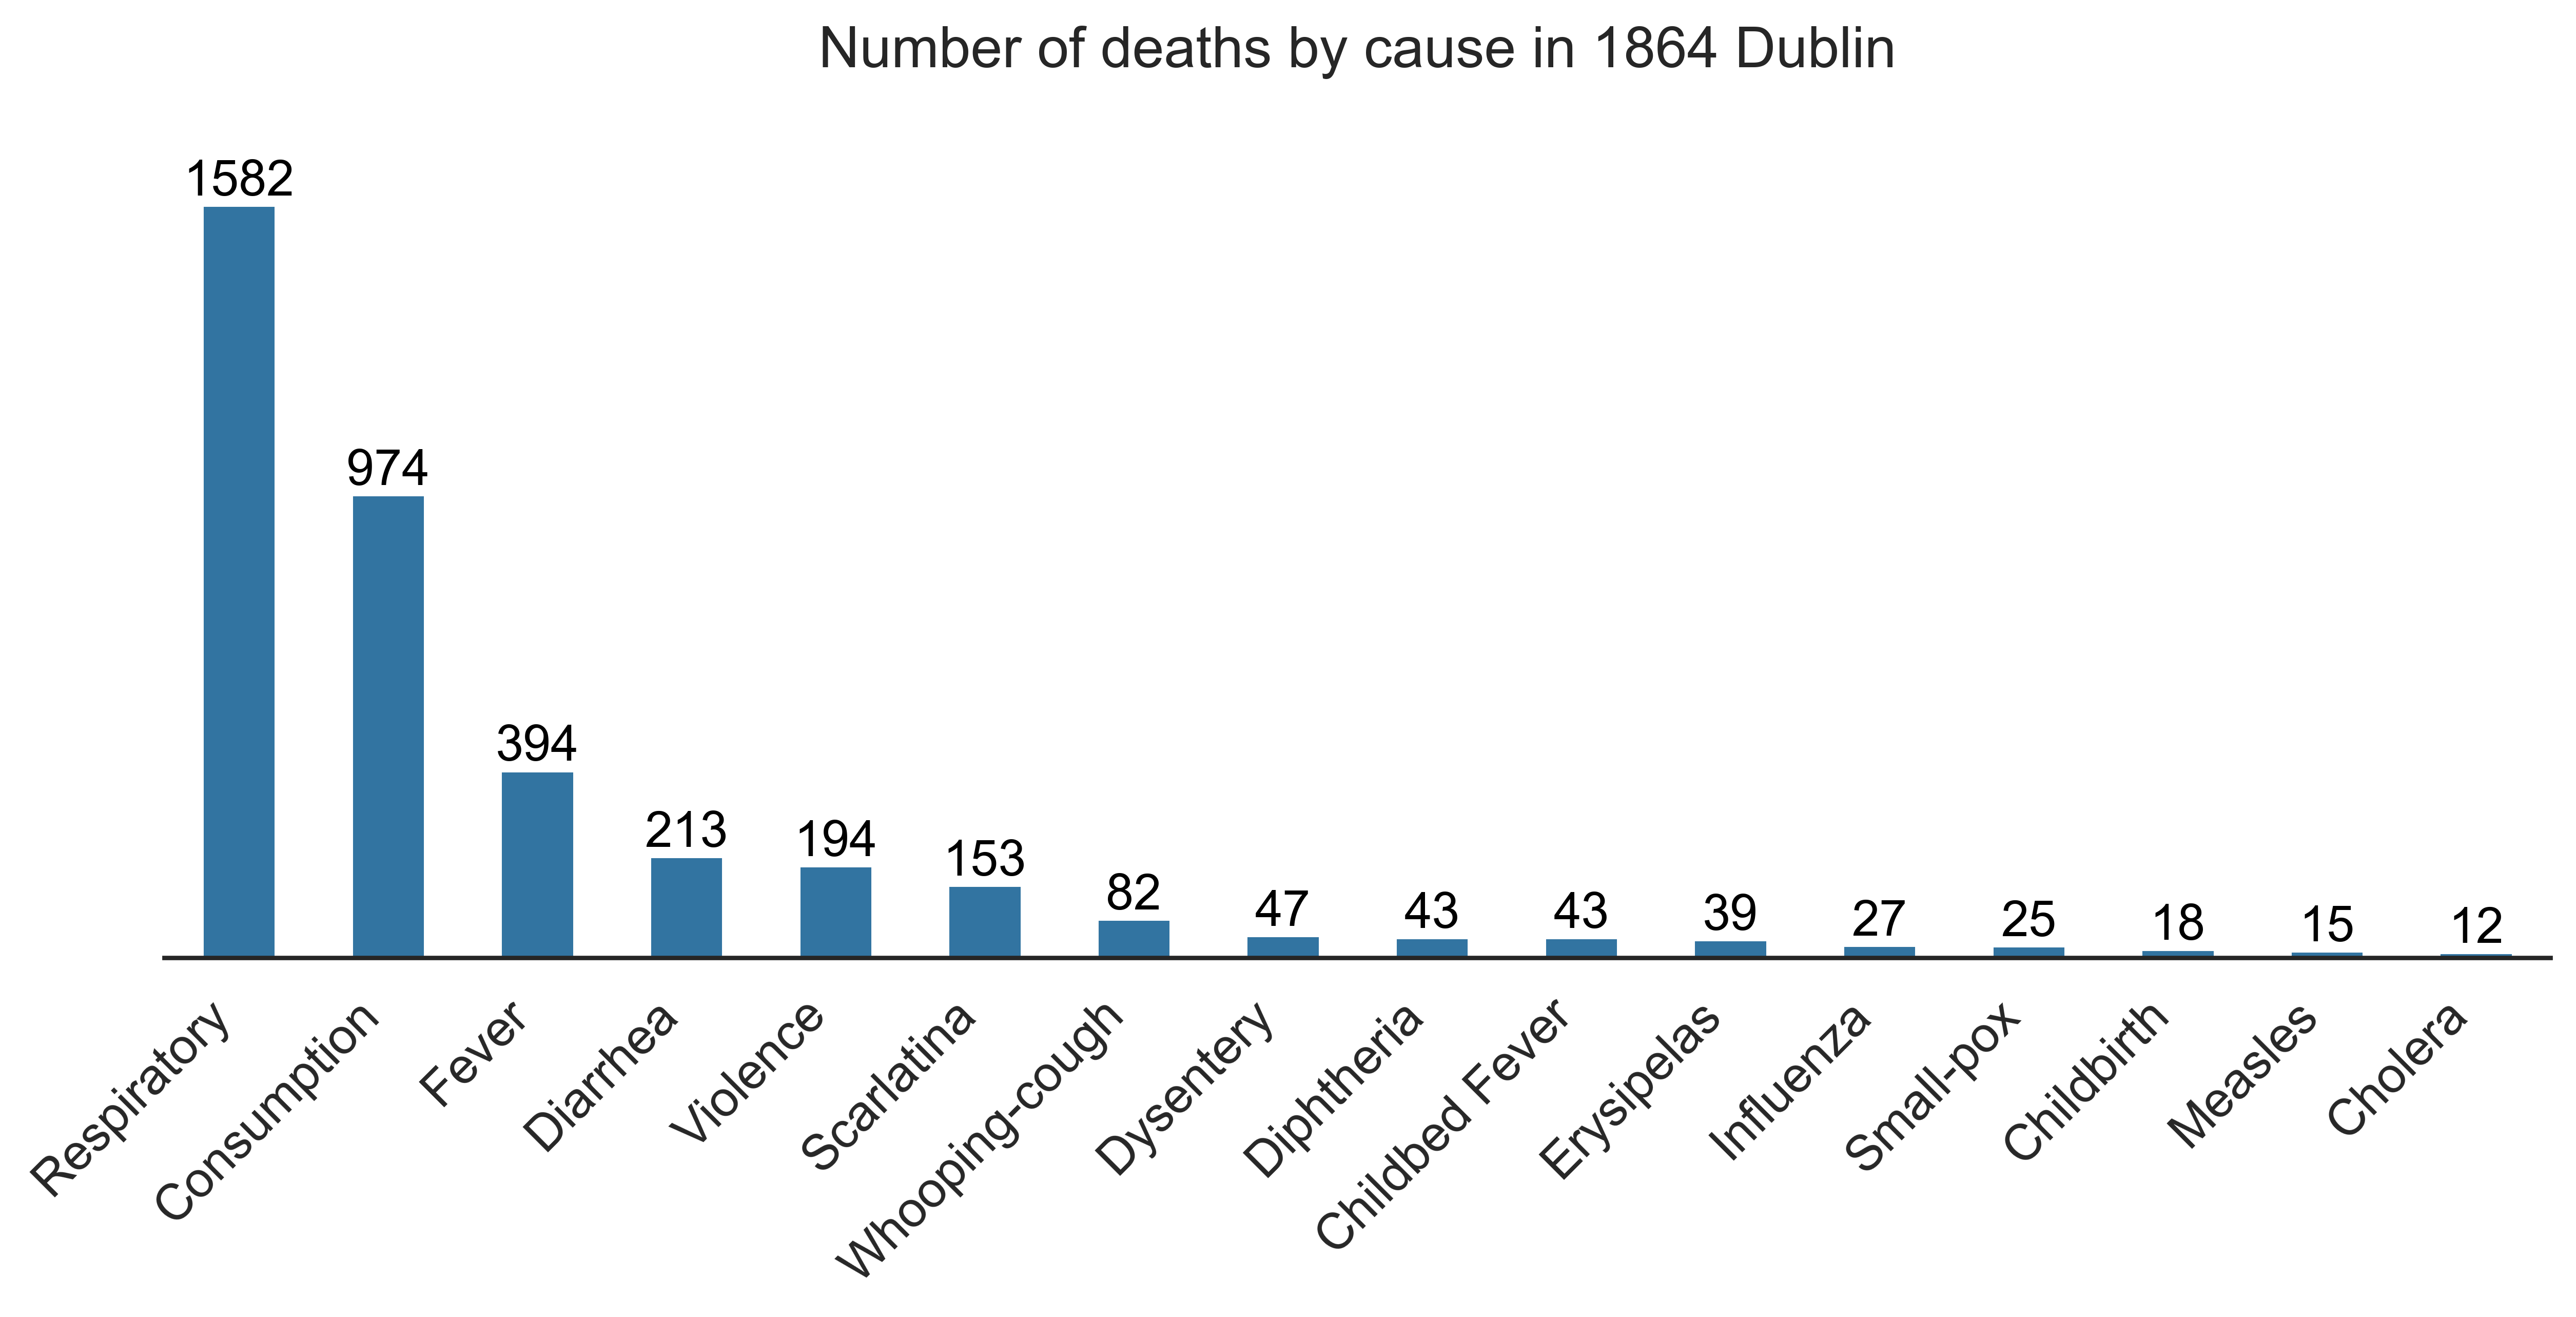

In [308]:
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

barplot = sns.barplot(data=causes_of_death_df, 
                      x='Cause of Death', 
                      y='Number of Deaths',  
                      color='tab:blue',
                      ax=ax, 
                      width=0.5)

# Add labels to each bar
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:  # Add a label only if the height is greater than 0
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar
            height,  # Height of the bar
            f'{height:.0f}',  # Format the label as an integer
            ha='center', va='bottom', fontsize=14, color='black'
        )

# ax.set_title("Births by Hospital in 1823", fontsize=16)

ax.set_title("Number of deaths by cause in 1864 Dublin", fontsize=16, y=1.10)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])
sns.despine(left=True)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14) 
plt.xticks(rotation=45, ha='right', va='top')
plt.show()

## Fig 10: Pareto chart

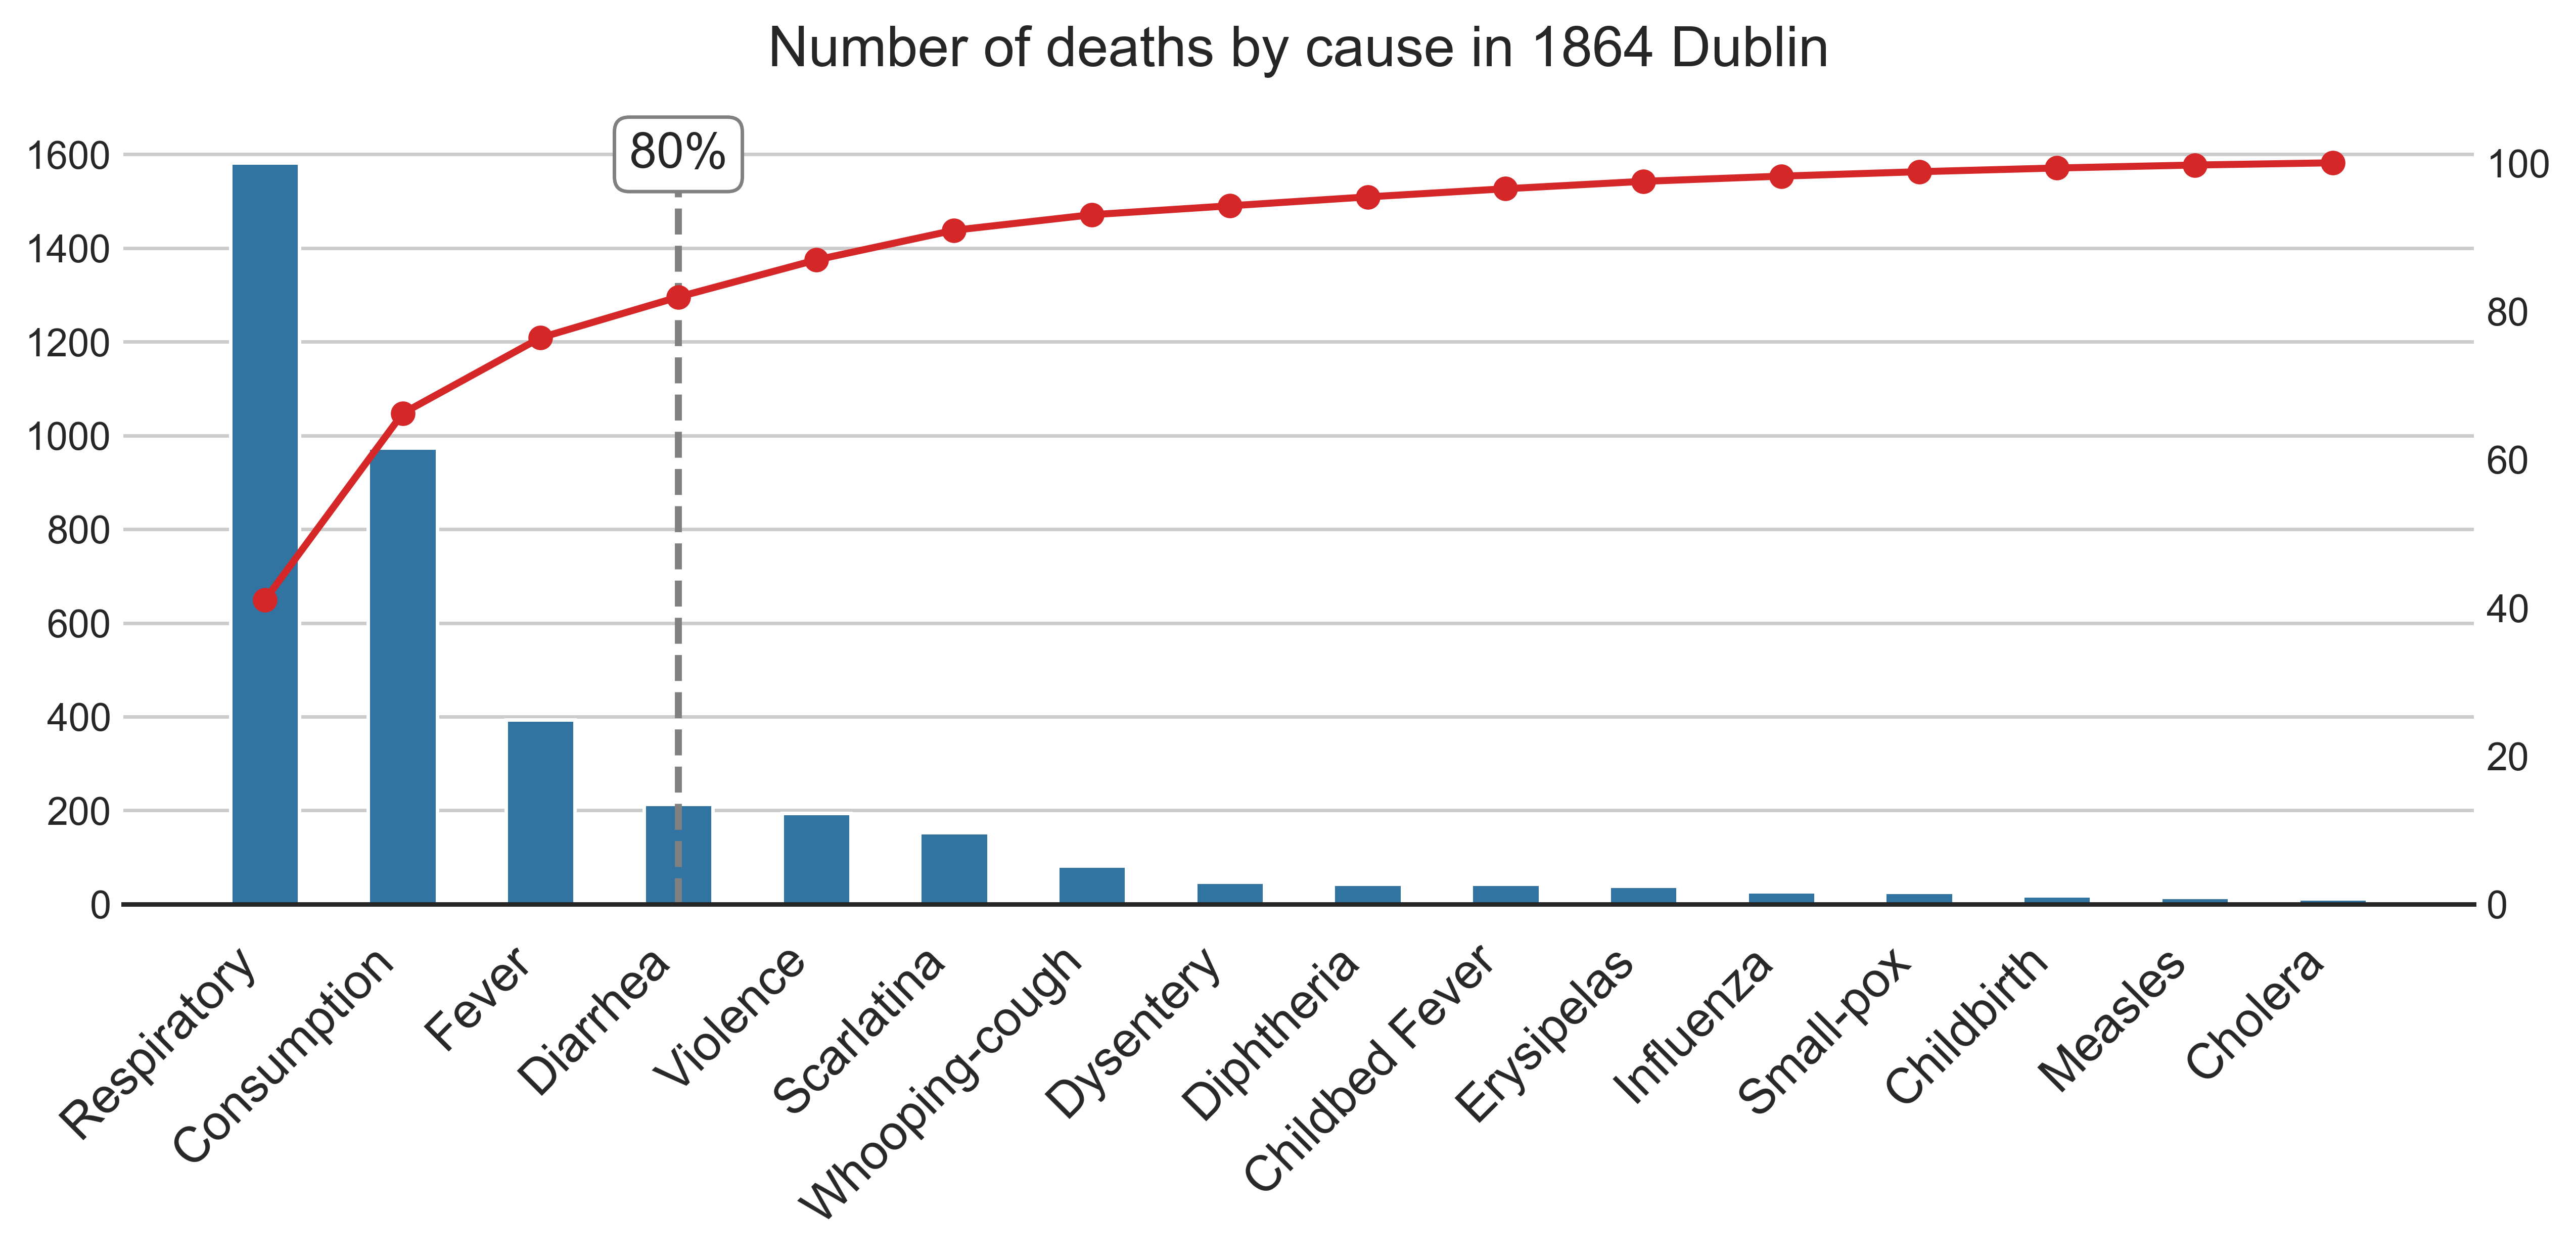

In [309]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=500)

# Bar plot (first plot the bars)
barplot = sns.barplot(data=causes_of_death_df, 
                      x='Cause of Death', 
                      y='Number of Deaths',  
                      color='tab:blue',
                      ax=ax, 
                      width=0.5)

# Plot the cumulative percentage curve (draw after bars)
ax2 = ax.twinx()  # Create a second y-axis for the curve
ax2.set_ylim(0, 105)
ax2.plot(causes_of_death_df['Cause of Death'], causes_of_death_df['Cumulative Percentage'], 
         color='tab:red', marker='o', linestyle='-', linewidth=2, zorder=5)  # Lower zorder

# Find the index where cumulative percentage is 80% or more
index_80 = causes_of_death_df[causes_of_death_df['Cumulative Percentage'] >= 80].iloc[0].name

# Add a vertical line at that index on the x-axis of the primary plot (ax)
ax.axvline(x=index_80, color='gray', linestyle='--', 
           linewidth=2)

# Remove x-tick labels for ax2
ax2.set_xticks([])  # Removes the x-tick labels on the secondary axis (ax2)
ax.tick_params(axis='y', length=0)
ax2.tick_params(axis='y', length=0)

# Add gridlines to ax2 (secondary axis)
ax.grid(True, axis='y', linestyle='-', linewidth=1, color='gray', alpha=0.4)  # Modify alpha for faint gridlines

# Add title and labels
ax.set_title("Number of deaths by cause in 1864 Dublin", fontsize=16, y=1.05)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True)

# Increase x-tick label size
ax.tick_params(axis='x', labelsize=14, rotation=45)

# Explicitly set x-ticks positions
ax.set_xticks(range(len(causes_of_death_df)))

# Align xtick labels to the right
ax.set_xticklabels(causes_of_death_df['Cause of Death'], rotation=45, ha='right')

# Add 80%  annotation
ax.annotate('80%',
           xy=(3,1600),
            ha='center', va='center', fontsize=14,
           bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

# Show the plot
plt.show()